## TITANIC SURVIVAL PREDICTION.

In [105]:
# Importing Libraries
import pandas as pd        
import numpy as np         
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")

In [106]:
# Loading dataset
df = pd.read_csv(r"E:\Desktop\codsoft\titanic\titanicarchive\Titanic-Dataset.csv")
print("Dataset Shape:", df.shape)

Dataset Shape: (891, 12)


In [107]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [109]:
# Initial Data Exploration
print("\nSummary statistics:")
d = df.describe(include = 'all')
d


Summary statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [110]:
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [111]:
print("\nData types of each column:")
df.dtypes


Data types of each column:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [112]:
print("\nUnique values in each column:")
for i in df.columns:
    print(i,':','\n',df[i].unique())


Unique values in each column:
PassengerId : 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235

In [113]:
# Exploratory Data Analysis

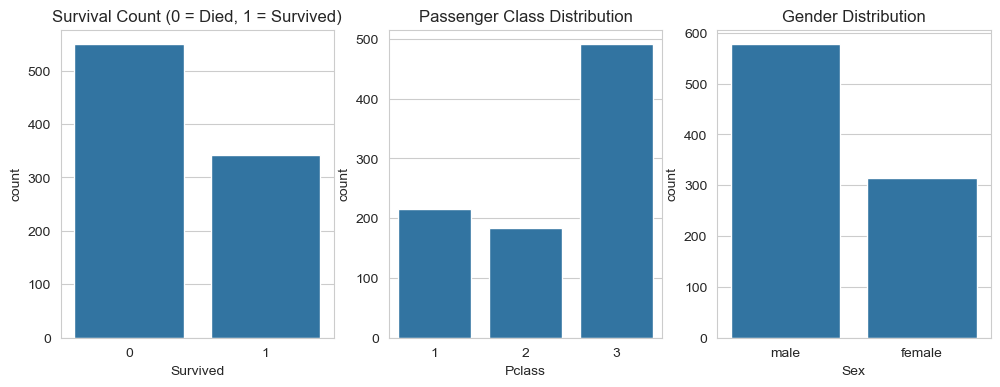

In [114]:
# Univariate Analysis

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = Died, 1 = Survived)')

plt.subplot(1,3,2)
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')

plt.subplot(1,3,3)
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')

plt.show()

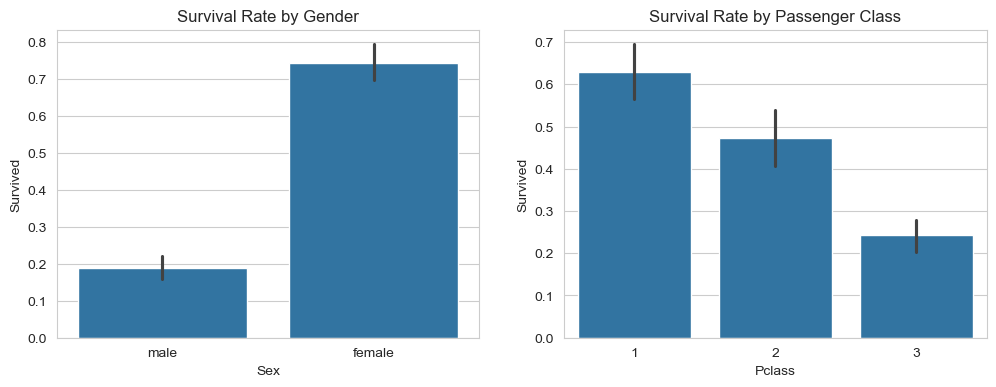

In [115]:
# Bivariate Analysis

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')

plt.subplot(1,2,2)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')

plt.show()

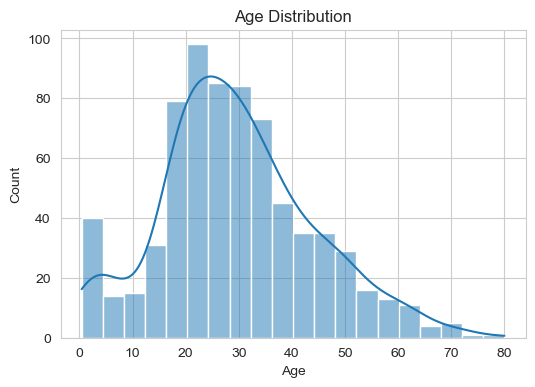

In [116]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

In [117]:
# DATA PREPROCESSING.

In [118]:
# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

C:\Users\SOMYA SUDEEPTA ORAM\AppData\Local\Temp\ipykernel_25380\3444597952.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\SOMYA SUDEEPTA ORAM\AppData\Local\Temp\ipykernel_25380\3444597952.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [119]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [120]:
# Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch']

In [121]:
# Converting Categorical data to Numeric
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [122]:
# Droping Irrelevant Columns
df.drop(columns=['Name','Ticket','Cabin'], inplace=True)

In [123]:
print("\nCleaned Data Sample:")
df.head()


Cleaned Data Sample:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,1,False,True
1,2,1,1,1,38.0,1,0,71.2833,1,False,False
2,3,1,3,1,26.0,0,0,7.9250,0,False,True
3,4,1,1,1,35.0,1,0,53.1000,1,False,True
4,5,0,3,0,35.0,0,0,8.0500,0,False,True


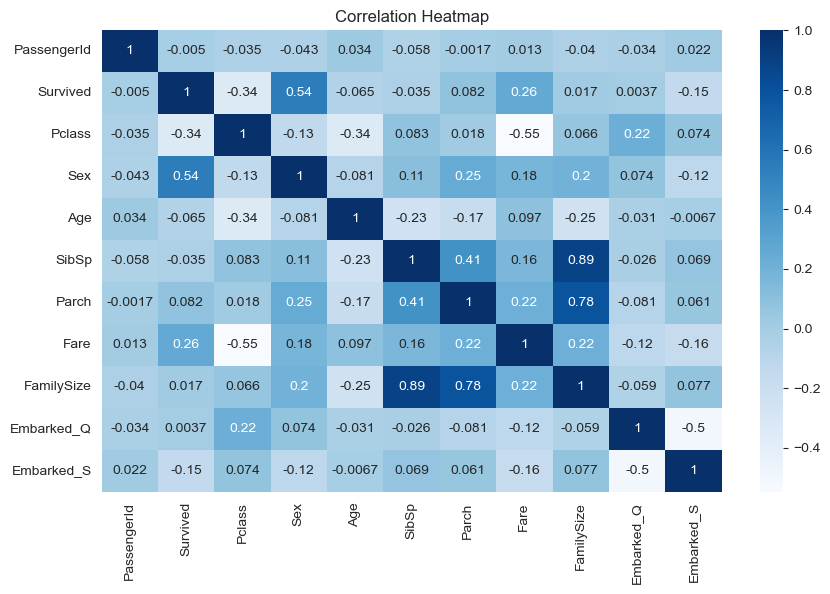

In [124]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [125]:
# Defining Input (x) and Output (y)
x = df.drop('Survived', axis=1)
y = df['Survived']

In [126]:
# Input data
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_Q,Embarked_S
0,1,3,0,22.0,1,0,7.2500,1,False,True
1,2,1,1,38.0,1,0,71.2833,1,False,False
2,3,3,1,26.0,0,0,7.9250,0,False,True
3,4,1,1,35.0,1,0,53.1000,1,False,True
4,5,3,0,35.0,0,0,8.0500,0,False,True


In [127]:
# Output data
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [129]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print("\nTraining set size:", x_train.shape)
print("Testing set size:", x_test.shape)


Training set size: (712, 10)
Testing set size: (179, 10)


In [131]:
# Standard Scaling for Logistic Regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [132]:
# Model Training (Classification Problem, since our output 'Survived' is binary.)

In [134]:
# Logistic Regression (Scaled)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train_scaled, y_train)
y_pred_lr = lr_model.predict(x_test_scaled)

In [137]:
print("\nLogistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression
Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [138]:
# Random Forest Classifier (Unscaled)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [145]:
print("\nRandom Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier
Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



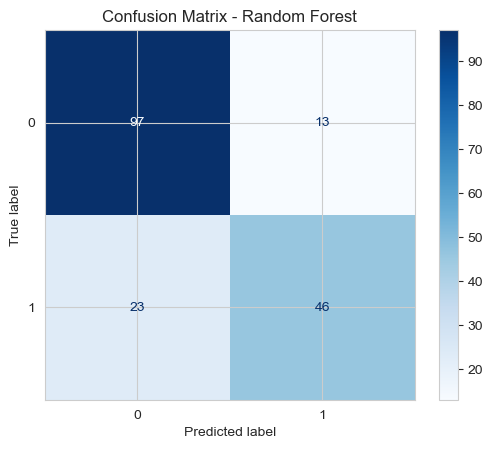

In [149]:
# Confusion Matrix for Best Model
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [151]:
# Saving the Best Model
import joblib
joblib.dump(rf_model, "titanic_best_model.pkl")
print("\n The best model is saved as titanic_best_model.pkl")


 The best model is saved as titanic_best_model.pkl
